In [39]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [40]:
df = pd.read_csv('./data.csv')
useful_columns = set(list(filter(lambda name: 'mean'  in name, df.columns)) + ['id', 'diagnosis'])
df = df.drop(list(filter(lambda name: name not in useful_columns, df.columns)), 1)

In [42]:
col1 = 'radius_mean'
col2 = 'texture_mean'
col3 = 'concavity_mean'

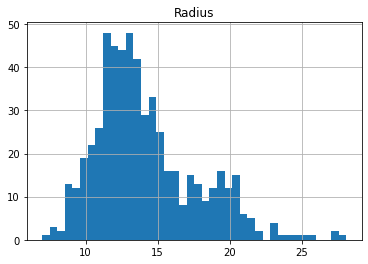

In [43]:
df[col1].hist(bins=40)
plt.pyplot.title('Radius')
plt.pyplot.savefig('radius.png')

In [44]:
boundaries1 = [0, 10, 14, 17, 23, 30]

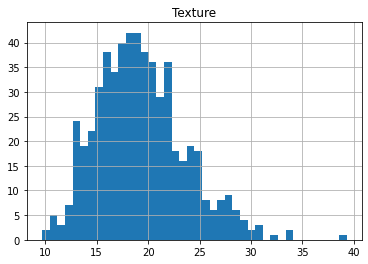

In [45]:
df[col2].hist(bins=40)
plt.pyplot.title('Texture')
plt.pyplot.savefig('texture.png')

In [46]:
boundaries2 = [0, 14, 21, 27, 41]

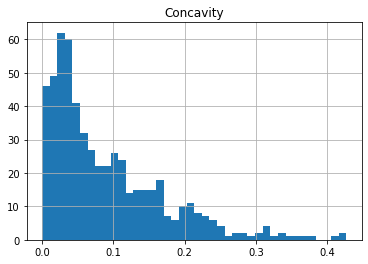

In [48]:
df[col3].hist(bins=40)
plt.pyplot.title('Concavity')
plt.pyplot.savefig('concavity.png')

In [49]:
boundaries3 = [0, 0.04, 0.15, 0.25, 0.35, 0.5]

In [65]:
def count_dist(boundaries):
    dist = {k:0 for k in range(len(boundaries1) - 1)}
    for el in df[col1]:
        for bound in range(len(boundaries1) - 1):
            if el > boundaries[bound] and el <= boundaries[bound + 1]:
                value = dist[bound]
                value += 1
                dist[bound] = value


In [66]:
dist1 = count_dist(boundaries1)
dist2 = count_dist(boundaries2)
dist3 = count_dist(boundaries3)

In [77]:
def count_cont_table(boundaries1, boundaries2):
    matrix = np.zeros((len(boundaries1) - 1,len(boundaries2) - 1))
    for _, el in df.iterrows():
        idx1 = 0
        idx2 = 0
        for bound1 in range(len(boundaries1) - 1):
            if el[col1] > boundaries1[bound1] and el[col1] <= boundaries1[bound1 + 1]:
                idx1 = bound1
        for bound2 in range(len(boundaries2) - 1):
            if el[col2] > boundaries2[bound2] and el[col2] <= boundaries2[bound2 + 1]:
                idx2 = bound2
        value = matrix[idx1][idx2]
        value += 1
        matrix[idx1][idx2] = value

    table = pd.DataFrame(matrix)
    table['Total'] = table.sum(axis=1)

    table_total = pd.DataFrame([table.sum(axis=0)], index=['Total'])
    table = pd.concat([table, table_total])
    return table

In [78]:
matrix12 = count_cont_table(boundaries1, boundaries2)
matrix13 = count_cont_table(boundaries1, boundaries3)

In [82]:
def count_quetelet_table(table, table_total):
    conditioanl_prob = pd.concat([table.iloc[:-1] / table.iloc[-1], table_total])
    quetelet = conditioanl_prob.iloc[:-1, :-1]
    quetelet = (quetelet.sub(conditioanl_prob.iloc[:-1, -1], axis='index').iloc[:-1, :-1])\
    .div(conditioanl_prob.iloc[:-1, -1], axis='index')
    quetelet['Total'] = conditioanl_prob.iloc[:-1, -1]
    quetelet = pd.concat([quetelet, table_total])
    quetelet =quetelet.rename(columns={"Total": "phk"})
    return quetelet

In [84]:
quetelet12 = count_quetelet_table(matrix12, pd.DataFrame([matrix12.sum(axis=0)], index=['Total']))
quetelet13 = count_quetelet_table(matrix13, pd.DataFrame([matrix13.sum(axis=0)], index=['Total']))

In [87]:
def count_phi(table, dist1, dist2):
    matrix = np.zeros((len(dist1), len(dist2)))
    for i in range(len(dist1)):
        for j in range(len(dist2)):
            matrix[i][j] = dist1[i] * dist2[j] / table.shape[0]**2
    hi = 0
    for i in range(len(dist1)):
        for j in range(len(dist2)):
            hi += (table.iloc[i, j] / table.shape[0] - matrix[i, j])**2 / matrix[i, j]